This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb

(train0_data, train0_labels), (test0_data, test0_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 23s 1us/step


In [2]:
train0_data.shape

(25000,)

Modifying the initial scheme (instead 25k each, making 40k, 10k train, test)

In [3]:
import numpy as np
train_data = np.concatenate((train0_data, test0_data[:15000]),axis=0)
train_labels = np.concatenate((train0_labels, test0_labels[:15000]),axis=0)

test_data   = test0_data[15000:]
test_labels = test0_labels[15000:]

In [4]:
train_data.shape, test_data.shape

((40000,), (10000,))

In [5]:
len(train_data), len(test_data)

(40000, 10000)

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [17]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

**Decoding reviews back to text**

In [15]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [16]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [21]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #sample axis
        for j in sequence:  # sequence axis (all encoded numbers)
            results[i, j] = 1.    # e.g. if sample=0, and 1st number in sequence=5, then results[0,5]=1.
        
    return results

In [22]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
#print(train_data[0])
print(x_train[0,4613])

1.0


In [28]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [31]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

Method_1

In [32]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
partial_x_train.shape, x_val.shape

((30000, 10000), (10000, 10000))

Method_2

In [35]:
#Most efficient way to randomize the inputs by using indices randomization
def data_split(inputs, targets, ratio: int):

    rIdx = np.random.permutation(len(inputs))
    shuffled_inputs = inputs[rIdx]
    shuffled_targets = targets[rIdx]

    # used for train/valid split
    num_validation_samples = int(ratio * len(inputs))

    val_inputs = shuffled_inputs[:num_validation_samples]
    val_targets = shuffled_targets[:num_validation_samples]

    train_inputs = shuffled_inputs[num_validation_samples:]
    train_targets = shuffled_targets[num_validation_samples:]

    return train_inputs, val_inputs, train_targets, val_targets 

In [36]:
partial_x_train, x_val, partial_y_train, y_val = data_split(x_train, y_train, 0.25)

In [37]:
partial_x_train.shape, x_val.shape

((30000, 10000), (10000, 10000))

Method 3

In [38]:
from sklearn.model_selection import train_test_split 

partial_x_train, x_val, partial_y_train, y_val = \
    train_test_split(x_train, y_train,
                     test_size=0.25,  
                     random_state=104,
                     shuffle=True) 

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
partial_x_train.shape, x_val.shape

**Training your model**

In [39]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 3s 36ms/step - loss: 0.5493 - accuracy: 0.7538 - val_loss: 0.3936 - val_accuracy: 0.8764
Epoch 2/20
59/59 [==============================] - 1s 14ms/step - loss: 0.3083 - accuracy: 0.8961 - val_loss: 0.2842 - val_accuracy: 0.8908
Epoch 3/20
59/59 [==============================] - 1s 14ms/step - loss: 0.2302 - accuracy: 0.9161 - val_loss: 0.2690 - val_accuracy: 0.8922
Epoch 4/20
59/59 [==============================] - 1s 12ms/step - loss: 0.1958 - accuracy: 0.9282 - val_loss: 0.2830 - val_accuracy: 0.8891
Epoch 5/20
59/59 [==============================] - 1s 13ms/step - loss: 0.1766 - accuracy: 0.9352 - val_loss: 0.2877 - val_accuracy: 0.8891
Epoch 6/20
59/59 [==============================] - 1s 13ms/step - loss: 0.1572 - accuracy: 0.9419 - val_loss: 0.3168 - val_accuracy: 0.8851
Epoch 7/20
59/59 [==============================] - 1s 12ms/step - loss: 0.1437 - accuracy: 0.9501 - val_loss: 0.3177 - val_accuracy: 0.8853
Epoch 8/20
59

In [41]:
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.8717


In [49]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in test0_data[4]])

In [52]:
print(decoded_review)

? like some other people wrote i'm a die hard mario fan and i loved this game br br this game starts slightly boring but trust me it's worth it as soon as you start your hooked the levels are fun and ? they will hook you ? your mind turns to ? i'm not kidding this game is also ? and is beautifully done br br to keep this spoiler free i have to keep my mouth shut about details but please try this game it'll be worth it br br story 9 9 action 10 1 it's that good ? 10 attention ? 10 average 10


In [54]:
results
#test0_data[0]

[0.6036729216575623, 0.8716999888420105]

In [57]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

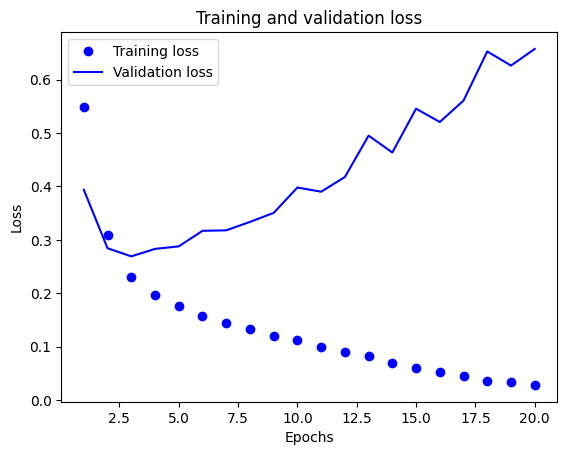

In [58]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

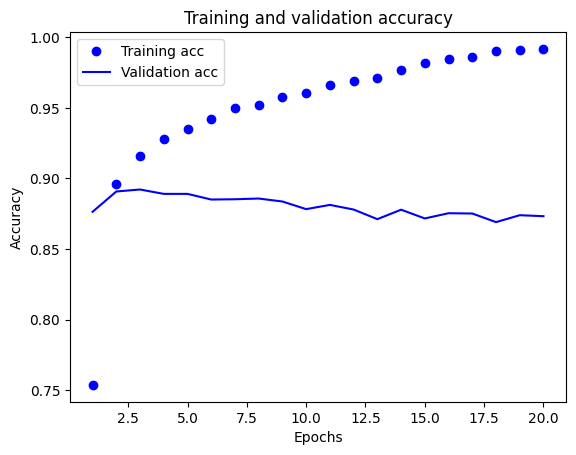

In [59]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [60]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

MemoryError: Unable to allocate 1.49 GiB for an array with shape (40000, 10000) and data type float32

In [ ]:
results

### Using a trained model to generate predictions on new data

In [ ]:
predictions = model.predict(x_test)

In [ ]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in test_data[4]])
decoded_review

In [ ]:
predictions[4]

In [ ]:
test_labels[4]

### Further experiments